In [2]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

client = bigquery.Client()

c:\Users\Admin\anaconda3\lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


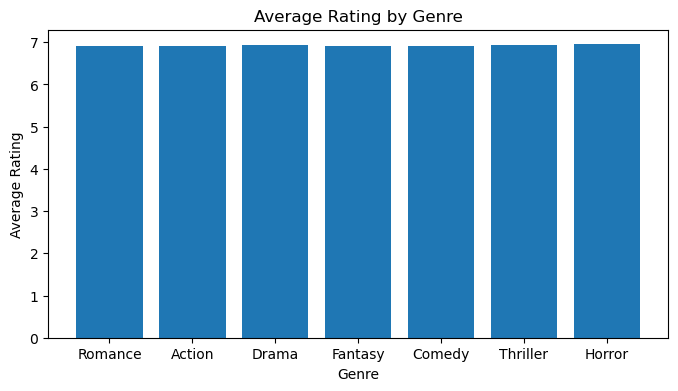

In [ ]:
# The average rating for each genre?

query = """
    SELECT ROUND(AVG(rating),2) AS Avg_Rating,genre_name
    FROM `custom-sylph-458304-r4.peerisland.fact_movies` AS fact
    JOIN `custom-sylph-458304-r4.peerisland.dim_genre` AS dim_g
    ON fact.genre_key = dim_g.genre_key
    GROUP BY genre_name
"""
job = client.query(query).to_dataframe()

plt.figure(figsize=(8,4))
plt.bar(job['genre_name'], job['Avg_Rating']) 
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Genre")
plt.show()

c:\Users\Admin\anaconda3\lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


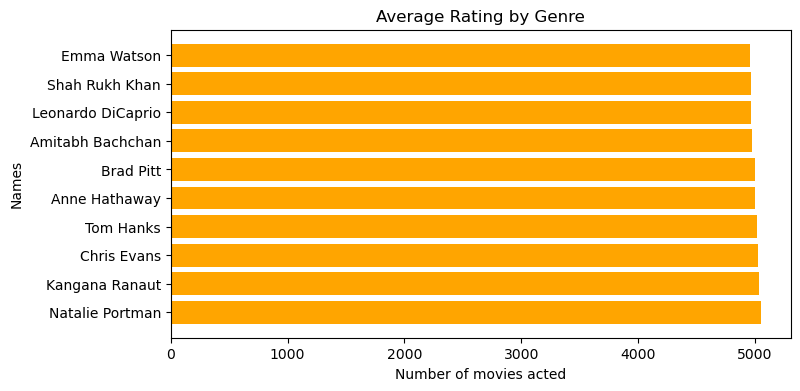

In [ ]:
# Which actors have appeared in the most movies?

query = """ 
    SELECT actor_name,COUNT(*) AS popular_actor
    FROM `custom-sylph-458304-r4.peerisland.fact_movies` AS fact
    JOIN `custom-sylph-458304-r4.peerisland.dim_actor` AS dim_a
    ON fact.actor_key = dim_a.actor_key
    GROUP BY actor_name
    ORDER BY popular_actor DESC
"""    
job = client.query(query).to_dataframe()

plt.figure(figsize=(8,4))
plt.barh(job['actor_name'],job['popular_actor'],color = 'orange')
plt.xlabel("Number of movies acted")
plt.ylabel("Names")
plt.title("Average Rating by Genre")
plt.show()



c:\Users\Admin\anaconda3\lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


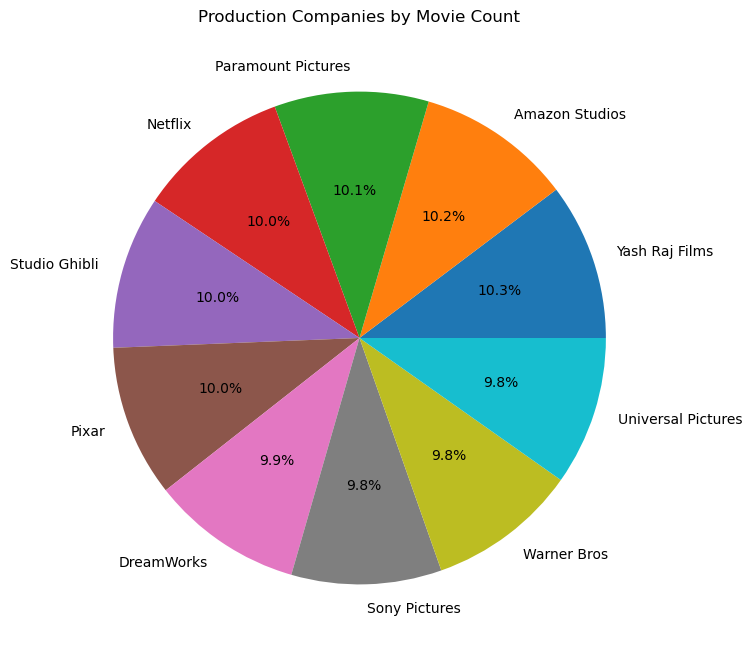

In [ ]:
# The production companies have the highest box office totals?

query = """ 
    SELECT company_name,COUNT(*) AS companies_with_totals
    FROM `custom-sylph-458304-r4.peerisland.fact_movies` AS fact
    JOIN `custom-sylph-458304-r4.peerisland.dim_production_company` AS dim_p_c
    ON fact.company_key = dim_p_c.company_key
    GROUP BY company_name
    ORDER BY companies_with_totals DESC
"""  

job = client.query(query).to_dataframe()
plt.figure(figsize=(8,8))
plt.title("Production Companies by Movie Count")
plt.pie(job['companies_with_totals'], labels=job['company_name'], autopct='%1.1f%%')
plt.show()

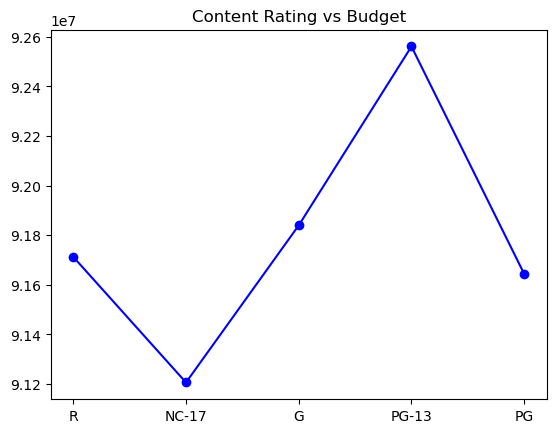

In [4]:
# The average budget and box office by content rating (e.g., PG, R)?

query = """ 
    SELECT content_rating_name, AVG(budget_usd) AS USD_Budget_Average, AVG(box_office_usd) AS Box_Office_Average
    FROM `custom-sylph-458304-r4.peerisland.fact_movies` AS fact
    JOIN `custom-sylph-458304-r4.peerisland.dim_content_rating` AS dim_c_r
    ON fact.content_rating_key = dim_c_r.content_rating_key
    GROUP BY content_rating_name;
"""  

job = client.query(query).to_dataframe()
pd.set_option('display.float_format', '{:,.2f}'.format)
plt.title("Content Rating vs Budget")
plt.plot(job['content_rating_name'], job['USD_Budget_Average'], color='blue', marker='o')
plt.show()

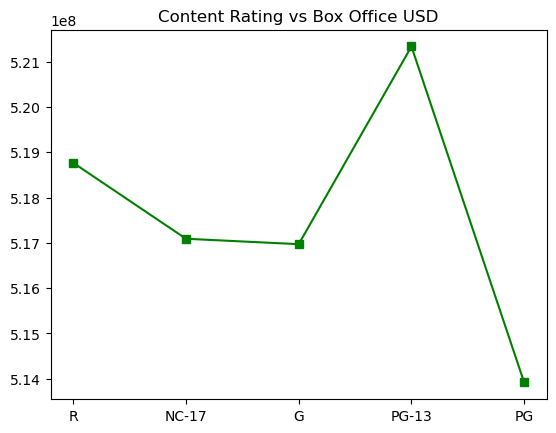

In [4]:
plt.title("Content Rating vs Box Office USD")
plt.plot(job['content_rating_name'], job['Box_Office_Average'], color='green', marker='s')
plt.show()

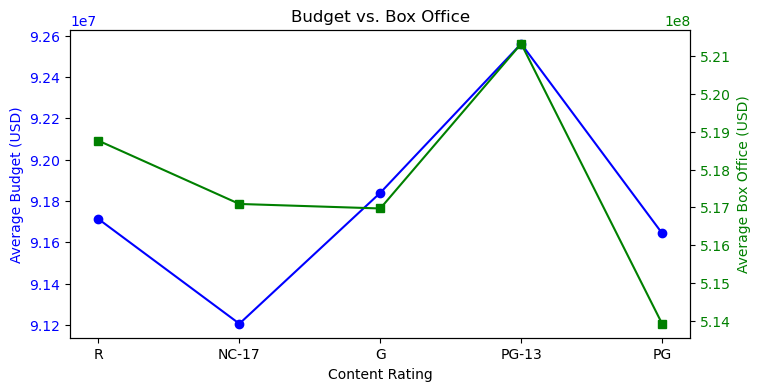

In [9]:
# both plots in single graph

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.set_title("Budget vs. Box Office")

ax1.set_xlabel('Content Rating')
ax1.set_ylabel('Average Budget (USD)', color='blue')
ax1.plot(job['content_rating_name'], job['USD_Budget_Average'], color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.set_ylabel('Average Box Office (USD)', color='green')
ax2.plot(job['content_rating_name'], job['Box_Office_Average'], color='green', marker='s')
ax2.tick_params(axis='y', labelcolor='green')